/tmp/ipykernel_25039/2927157256.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
/tmp/ipykernel_25039

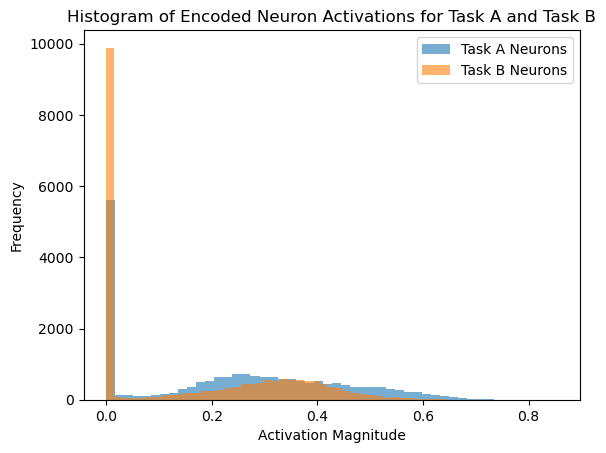

In [ ]:
import sys
import os

from autoencoder import SparseAutoencoder
from utils import load_data

import torch
import matplotlib.pyplot as plt

# Ensure required directories exist
os.makedirs("models", exist_ok=True)
os.makedirs("data", exist_ok=True)

# Load saved models and activation data
task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
task_b_autoencoder = torch.load("../models/task_b_autoencoder.pth")
task_a_activations = torch.load("../data/task_a_activations.pt")
task_b_activations = torch.load("../data/task_b_activations.pt")

# Encode activations for visualization
encoded_a, _ = task_a_autoencoder(task_a_activations)
encoded_b, _ = task_b_autoencoder(task_b_activations)

# Plot histogram
plt.hist(encoded_a.detach().numpy().flatten(), bins=50, alpha=0.6, label="Task A Neurons")
plt.hist(encoded_b.detach().numpy().flatten(), bins=50, alpha=0.6, label="Task B Neurons")
plt.xlabel("Activation Magnitude")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Encoded Neuron Activations for Task A and Task B")
plt.show()
